In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Epileptic Seizure Recognition.csv')

In [ ]:
#data=pd.read_csv('/Users/Sharmishta/Downloads/Epileptic Seizure Recognition.csv/Epileptic Seizure Recognition.csv')

In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
data.shape

(11500, 180)

In [ ]:
cols = data.columns
y = data.y
y[y>1]=0

non_seizure, seizure = y.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-7-9e7d252921cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1]=0


In [ ]:
print(data['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
data = data.drop('Unnamed', axis = 1)
#data1=data.drop(['y'],axis=1)
#data1.head()

In [ ]:
import imblearn

oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

df1, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

df1.shape, y.shape
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,329,124,-32,-13,147,347,466,499,551,610,...,393,148,-342,-773,-882,-607,-291,63,293,656
18396,154,139,122,109,105,114,116,114,112,103,...,336,236,88,-91,-280,-429,-513,-430,-243,22
18397,-613,-583,-433,-130,184,491,667,699,633,524,...,243,190,150,109,78,36,-11,-74,-146,-234
18398,552,524,497,483,456,425,359,264,142,17,...,994,966,910,789,619,402,243,131,97,43


In [ ]:
df1['y']=y
print(df1['y'].value_counts())

y
0    9200
1    9200
Name: count, dtype: int64


<ipython-input-12-6ba87d2f3b4f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['y']=y


In [ ]:
df1=df1.drop('y', axis=1)
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,329,124,-32,-13,147,347,466,499,551,610,...,393,148,-342,-773,-882,-607,-291,63,293,656
18396,154,139,122,109,105,114,116,114,112,103,...,336,236,88,-91,-280,-429,-513,-430,-243,22
18397,-613,-583,-433,-130,184,491,667,699,633,524,...,243,190,150,109,78,36,-11,-74,-146,-234
18398,552,524,497,483,456,425,359,264,142,17,...,994,966,910,789,619,402,243,131,97,43


In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df1))
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.633104,0.847020,1.012323,0.992933,0.854862,0.555958,0.246535,-0.028369,-0.132290,-0.158609,...,0.068391,-0.027532,-0.008756,-0.062167,-0.239160,-0.347753,-0.457059,-0.418369,-0.278776,-0.145828
1,1.666720,1.630081,1.537099,1.447340,1.398083,1.364817,1.318379,1.152832,1.028355,0.985625,...,0.717098,0.709328,0.659581,0.644536,0.675284,0.702527,0.716226,0.713795,0.660302,0.588229
2,-0.054601,-0.086943,-0.128136,-0.101008,-0.095773,-0.129444,-0.229840,-0.297397,-0.350173,-0.395931,...,0.153533,0.273726,0.311236,0.253254,0.144188,0.019845,-0.054908,-0.078720,-0.079326,-0.084657
3,-0.355214,-0.339807,-0.330609,-0.332419,-0.337676,-0.380616,-0.421241,-0.410893,-0.358553,-0.332362,...,-0.288399,-0.292151,-0.276090,-0.257808,-0.239160,-0.275041,-0.249764,-0.233868,-0.220603,-0.202922
4,0.040113,-0.192983,-0.338873,-0.374494,-0.290993,-0.180530,-0.055453,0.009463,-0.082010,-0.247604,...,0.076499,0.057960,0.060103,0.013694,-0.059465,-0.097302,-0.200014,-0.279993,-0.303708,-0.235547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,1.431994,0.577843,-0.066155,-0.000029,0.663887,1.501045,1.994661,2.107040,2.314701,2.587551,...,1.629343,0.644191,-1.333277,-3.024730,-3.453689,-2.383680,-1.136983,0.332214,1.283584,2.737384
18396,0.711346,0.639020,0.570188,0.513282,0.485642,0.509129,0.505989,0.488669,0.475268,0.438936,...,1.398241,1.002444,0.408448,-0.301727,-1.049780,-1.664642,-2.057370,-1.735033,-0.943611,0.151872
18397,-2.447154,-2.305617,-1.723127,-0.492303,0.820911,2.114075,2.849584,2.947752,2.658286,2.223092,...,1.021180,0.815176,0.659581,0.496807,0.379787,0.213743,0.023864,-0.242254,-0.540555,-0.892120
18398,2.350306,2.209220,2.119725,2.086875,1.975254,1.833103,1.539553,1.119203,0.600969,0.074476,...,4.066051,3.974312,3.737979,3.211825,2.540111,1.692214,1.076918,0.617351,0.469162,0.237512


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test1))
print("Validation set size:", len(X_val))

Training set size: 11040
Testing set size: 3680
Validation set size: 3680


In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test1 = X_test1.values.reshape((X_test1.shape[0], X_test1.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

In [ ]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

11040
178
1


In [ ]:
print(X_train.shape)
print(X_test1.shape)
print(X_val.shape)

(11040, 178, 1)
(3680, 178, 1)
(3680, 178, 1)


In [ ]:
import keras.utils
y_train = keras.utils.to_categorical(y_train)
y_test1= keras.utils.to_categorical(y_test1)
y_val= keras.utils.to_categorical(y_val)

In [ ]:
print(y_train.shape)
print(y_test1.shape)
print(y_val.shape)

(11040, 2)
(3680, 2)
(3680, 2)


In [ ]:
#y_train = y_train.reshape((y_train.shape[0], 3))
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_val, (-1, 2))
y_test1 = np.reshape(y_test1, (-1, 2))

In [ ]:
print(y_train.shape[0])
print(y_train.shape[1])

11040
2


In [ ]:
#from keras.layers.rnn import LSTMV1
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional,RNN,GRUCell
from tensorflow.keras.layers import Dense, Add
from keras.models import Sequential, Model
#from keras.utils import plot_model
from keras.layers import Input, Dense, Dropout
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense



In [ ]:
# Attention Layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        self.W_k = self.add_weight(name="W_k",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        attention_score = tf.matmul(q, k, transpose_b=True)
        attention_score = tf.nn.softmax(attention_score, axis=-1)
        output = tf.matmul(attention_score, v)

        return output

# Model with Attention Layer
def CNN1D():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Convolutional layers
    conv1 = Conv1D(filters=8, kernel_size=7)(inputs)

    conv2 = Conv1D(filters=16, kernel_size=5)(conv1)

    conv3 = Conv1D(filters=32, kernel_size=3)(conv2)

    conv4 = Conv1D(filters=64, kernel_size=1)(conv3)
    pool4 = MaxPooling1D(pool_size=2)(conv4)

    conv5 = Conv1D(filters=128, kernel_size=1)(pool4)
    pool5 = MaxPooling1D(pool_size=2)(conv5)

    # Flatten layer
    #flatten = Flatten()(pool5)

    # Dense layers
    dense = Bidirectional(GRU(64, return_sequences = True))(pool5)
    dense1 = Bidirectional(GRU(32))(dense)
    output = Dense(2, activation='softmax')(dense1)

    # Create model
    model = Model(inputs=inputs, outputs=output)
    print(model.summary())
    return model

In [ ]:
#creating model
model1 = CNN1D()
#Compiling model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC(num_thresholds=200,
                                       curve="ROC",
                                       summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 178, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 172, 8)            64        
                                                                 
 conv1d_1 (Conv1D)           (None, 168, 16)           656       
                                                                 
 conv1d_2 (Conv1D)           (None, 166, 32)           1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 166, 64)           2112      
                                                                 
 max_pooling1d (MaxPooling1  (None, 83, 64)            0         
 D)                                                              
                                                             

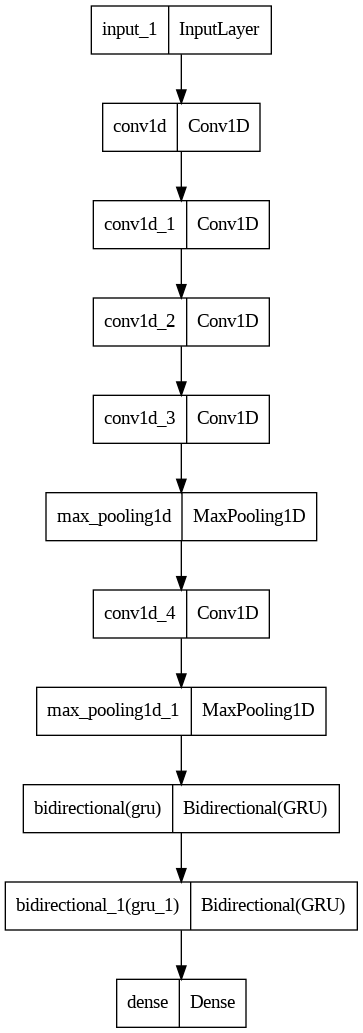

In [ ]:
import keras
from keras.utils import plot_model
plot_model(model1)

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
345/345 [==============================] - 53s 126ms/step - loss: 0.1313 - accuracy: 0.9471 - Recall: 0.9471 - Precision: 0.9471 - AUC: 0.9851 - val_loss: 0.0831 - val_accuracy: 0.9715 - val_Recall: 0.9715 - val_Precision: 0.9715 - val_AUC: 0.9896
Epoch 2/50
345/345 [==============================] - 42s 121ms/step - loss: 0.0791 - accuracy: 0.9716 - Recall: 0.9716 - Precision: 0.9716 - AUC: 0.9908 - val_loss: 0.0992 - val_accuracy: 0.9639 - val_Recall: 0.9639 - val_Precision: 0.9639 - val_AUC: 0.9869
Epoch 3/50
345/345 [==============================] - 41s 120ms/step - loss: 0.0574 - accuracy: 0.9804 - Recall: 0.9804 - Precision: 0.9804 - AUC: 0.9938 - val_loss: 0.0476 - val_accuracy: 0.9829 - val_Recall: 0.9829 - val_Precision: 0.9829 - val_AUC: 0.9959
Epoch 4/50
345/345 [==============================] - 46s 133ms/step - loss: 0.0467 - accuracy: 0.9827 - Recall: 0.9827 - Precision: 0.9827 - AUC: 0.9963 - val_loss: 0.0830 - val_accuracy: 0.9709 - val_Recall: 0.9709 - val_

In [28]:
pred=model1.predict(X_test1)

115/115 [==============================] - 5s 26ms/step


Text(0, 0.5, 'Accuracy')

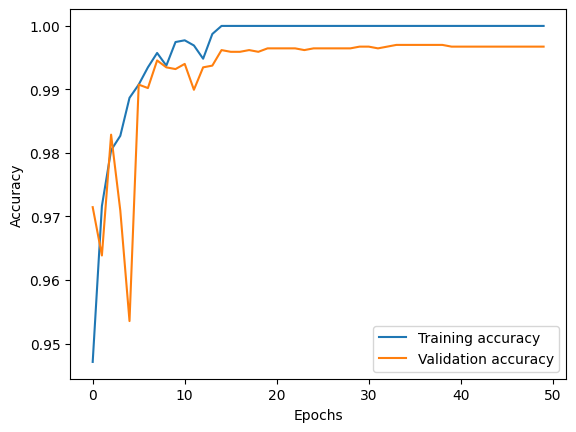

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

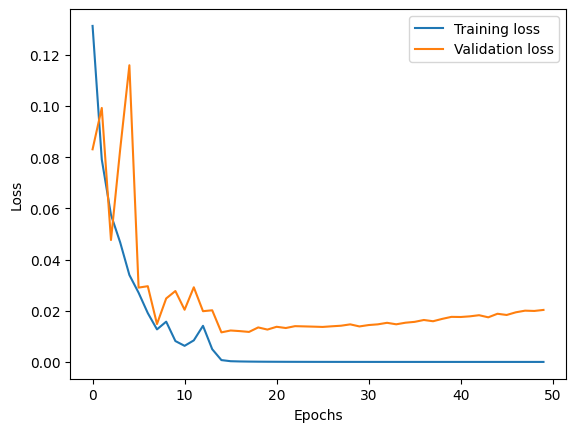

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

Accuracy: 0.998098


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[1813    6]
 [   1 1860]]


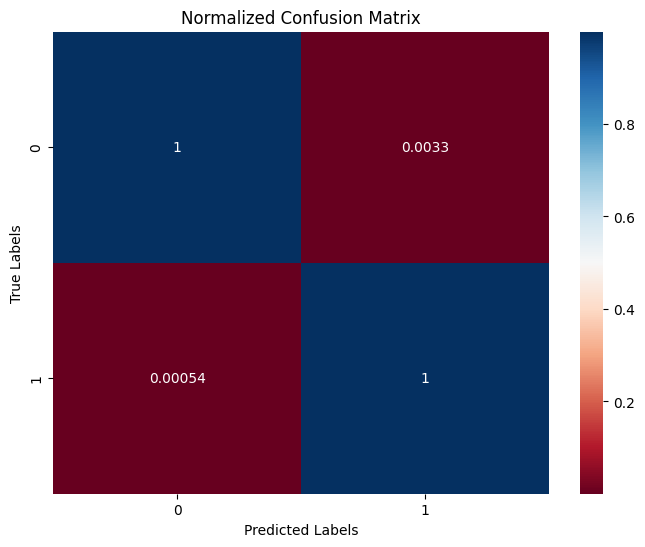

In [33]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='RdBu')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [34]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1819
           1       1.00      1.00      1.00      1861

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680

